In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/historical_weather_data.csv")
df=pd.DataFrame(df)
df.head()

,Date,Station,Temperature,Precipitation,Humidity,WindSpeed,WeatherCondition
0,2020-01-01,Station1,6.653288,0.00000,64.421750,9.562955,Partly Cloudy
1,2020-01-02,Station1,-2.031372,2.98847,85.492843,6.502074,Cloudy
2,2020-01-03,Station1,-6.428333,0.00000,90.456869,3.486873,Snow
3,2020-01-04,Station1,31.471383,0.00000,98.352442,17.288559,Partly Cloudy
4,2020-01-05,Station1,34.220877,0.00000,89.589972,12.807424,Snow


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1095 non-null   object 
 1   Station           1095 non-null   object 
 2   Temperature       1095 non-null   float64
 3   Precipitation     1095 non-null   float64
 4   Humidity          1095 non-null   float64
 5   WindSpeed         1095 non-null   float64
 6   WeatherCondition  1095 non-null   object 
dtypes: float64(4), object(3)
memory usage: 60.0+ KB


In [ ]:
df["Date"]=pd.to_datetime(df["Date"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1095 non-null   datetime64[ns]
 1   Station           1095 non-null   object        
 2   Temperature       1095 non-null   float64       
 3   Precipitation     1095 non-null   float64       
 4   Humidity          1095 non-null   float64       
 5   WindSpeed         1095 non-null   float64       
 6   WeatherCondition  1095 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 60.0+ KB


In [ ]:
df["month"]=df["Date"].dt.month

In [ ]:
df.drop(["Date"],axis=1,inplace=True)

In [ ]:
df.Station.unique()

array(['Station1', 'Station2', 'Station3'], dtype=object)

In [ ]:
df["Station"]=df["Station"].replace({"Station1":1,"Station2":2,"Station3":3})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Station           1095 non-null   int64  
 1   Temperature       1095 non-null   float64
 2   Precipitation     1095 non-null   float64
 3   Humidity          1095 non-null   float64
 4   WindSpeed         1095 non-null   float64
 5   WeatherCondition  1095 non-null   object 
 6   month             1095 non-null   int32  
dtypes: float64(4), int32(1), int64(1), object(1)
memory usage: 55.7+ KB


In [ ]:
df.WeatherCondition.unique()

array(['Partly Cloudy', 'Cloudy', 'Snow', 'Rain', 'Sunny'], dtype=object)

In [ ]:
df["wc"]=df["WeatherCondition"].replace({'Partly Cloudy':-2, 'Cloudy':-1, 'Snow':0, 'Rain':1, 'Sunny':2})

In [ ]:
df.drop(["WeatherCondition"],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Station        1095 non-null   int64  
 1   Temperature    1095 non-null   float64
 2   Precipitation  1095 non-null   float64
 3   Humidity       1095 non-null   float64
 4   WindSpeed      1095 non-null   float64
 5   month          1095 non-null   int32  
 6   wc             1095 non-null   int64  
dtypes: float64(4), int32(1), int64(2)
memory usage: 55.7 KB


In [ ]:
df.columns=df.columns.str.lower()

Heatmap

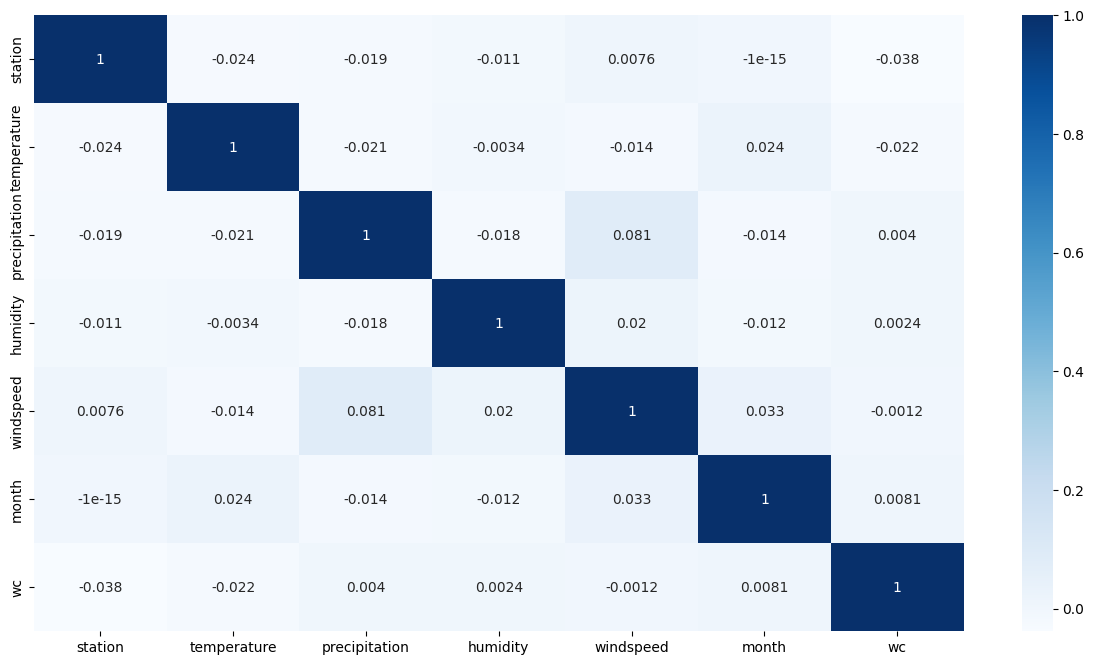

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()

In [ ]:
df.drop(["windspeed"],axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop(["wc"],axis=1)
y=df.wc
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k=3
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.2191780821917808


In [ ]:
mydict={'act':y_test, 'pred':y_pred}
print(mydict)

{'act': 974    -2
435     0
1029    0
680    -2
867    -2
       ..
75      0
650     1
697     2
202    -1
772    -1
Name: wc, Length: 219, dtype: int64, 'pred': array([ 1,  2, -2, -2,  0, -2, -2, -2, -1, -2,  0, -2, -1, -1,  2, -1, -1,
       -2,  1, -1,  1,  0, -2, -2, -1,  2, -1, -2,  0, -2, -2, -2,  1, -2,
       -1, -1, -2,  2,  0, -2, -1,  1,  2, -2, -1, -2, -1, -1,  0, -2, -1,
       -1, -2,  1,  2,  0,  0, -1, -1, -2, -2, -2,  1, -1,  0,  1, -1, -2,
        0, -2, -2, -1, -2,  1,  1, -2, -2,  1, -1, -1,  1, -2,  1,  1, -2,
       -2, -2, -2, -2, -2,  2,  1, -1, -1,  0,  2,  2, -2, -1,  2, -2,  0,
        2, -2,  0, -2, -1,  1, -1, -2, -2, -1, -2, -2, -2, -2,  0, -2,  1,
       -1,  0, -2, -1, -2,  0, -2,  0,  0, -2,  0, -1, -2,  2, -2,  0, -2,
       -2, -2,  2, -1,  1,  0, -2,  1, -2, -2, -1, -1, -2, -2,  0, -2, -2,
        2,  0, -2, -1, -2,  0, -2, -2, -1, -2,  1, -1,  1, -1, -1,  1, -2,
       -2, -2, -1,  2, -2,  2, -2, -2,  0,  1,  1, -2, -2, -2,  2, -2,  0,
        2,  

In [ ]:
from sklearn.model_selection import GridSearchCV
knn_model=KNeighborsClassifier()
knn_params={"n_neighbors":np.arange(1,50),"metric":["minkowski","euclidean","manhattan"],"weights":["uniform","distance"]}
knn_cv=GridSearchCV(estimator=knn_model,param_grid=knn_params,cv=10)
knn_cv.fit(x_train,y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']})

In [ ]:
knn_cv.best_params_

{'metric': 'manhattan', 'n_neighbors': 26, 'weights': 'uniform'}

In [ ]:
knn_tuned=KNeighborsClassifier(n_neighbors=4)
knn_tuned.fit(x_train,y_train)
y_pred=knn_tuned.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.2191780821917808


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -2       0.16      0.26      0.20        42
          -1       0.27      0.25      0.26        51
           0       0.28      0.21      0.24        52
           1       0.27      0.20      0.23        40
           2       0.15      0.15      0.15        34

    accuracy                           0.22       219
   macro avg       0.23      0.22      0.22       219
weighted avg       0.23      0.22      0.22       219

